In [54]:
#packages needed
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [55]:
#creating dataframes from csv's
df_2022 = pd.read_csv('datasets/cae_2022.csv')
df_2021 = pd.read_csv('datasets/cae_2021.csv')


In [56]:
#Print the sample data for 2022
df_2022.head()

,SCHOOL YEAR,COUNTY NUMBER,COUNTY NAME,DISTRICT NUMBER,DISTRICT NAME,SCHOOL NUMBER,SCHOOL NAME,SCHOOL CODE,STATE SCHOOL ID,NCES ID,...,Suppressed Average Score,Average ACT Scores: English,Average ACT Scores: Reading,Average ACT Scores: Math,Average ACT Scores: Science,Average ACT Composite Score,Suppressed Benchmark Scores,Percent of Students Meeting Benchmarks: English,Percent of Students Meeting Benchmarks: Reading,Percent of Students Meeting Benchmarks: Math
0,20212022,1.0,ADAIR,1,Adair County,NaN,---District Total---,1,NaN,NaN,...,N,15.2,17.2,16.7,16.8,16.6,N,32.0,31.0,20.0
1,20212022,1.0,ADAIR,1,Adair County,NaN,---District Total---,1,NaN,NaN,...,N,15.5,18.2,16.8,16.6,16.9,N,34.0,36.0,20.0
2,20212022,1.0,ADAIR,1,Adair County,NaN,---District Total---,1,NaN,NaN,...,N,14.9,16.2,16.6,16.9,16.3,N,31.0,27.0,21.0
3,20212022,1.0,ADAIR,1,Adair County,NaN,---District Total---,1,NaN,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN
4,20212022,1.0,ADAIR,1,Adair County,NaN,---District Total---,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#Print the sample data for 2021
df_2021.head()

,SCHOOL YEAR,COUNTY NUMBER,COUNTY NAME,DISTRICT NUMBER,DISTRICT NAME,SCHOOL NUMBER,SCHOOL NAME,SCHOOL CODE,STATE SCHOOL ID,NCES ID,...,Average ACT Scores: English,Average ACT Scores: Reading,Average ACT Scores: Math,Average ACT Scores: Science,Average ACT Composite Score,Suppressed Benchmark Scores,Number of Students in Benchmark,Number of Students Meeting Benchmarks: English,Number of Students Meeting Benchmarks: Reading,Number of Students Meeting Benchmarks: Math
0,20202021,1.0,ADAIR,1,Adair County,NaN,---District Total---,1,NaN,NaN,...,14.7,16.4,16.3,17.0,16.2,N,161,23.6,25.5,11.8
1,20202021,1.0,ADAIR,1,Adair County,NaN,---District Total---,1,NaN,NaN,...,16.0,18.0,16.9,17.6,17.3,N,81,35.8,34.6,18.5
2,20202021,1.0,ADAIR,1,Adair County,NaN,---District Total---,1,NaN,NaN,...,13.4,14.7,15.8,16.3,15.2,N,80,11.3,16.3,5.0
3,20202021,1.0,ADAIR,1,Adair County,NaN,---District Total---,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Y,1,NaN,NaN,NaN
4,20202021,1.0,ADAIR,1,Adair County,NaN,---District Total---,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


I am exploring in this notebook are:

 List of schools in Kentucky that met with Benchmark.
 What is the percentage of students who met benchmarks over the years? By County
and/or By School



In [58]:
#Choosing the data that meets criteria!.  

df_2021 = df_2021[(df_2021['SCHOOL NAME'] != '---District Total---') & (df_2021['DISTRICT NAME'].str.contains('County')) & (df_2021['DEMOGRAPHIC']  == 'All Students')  ]
df_2021 = df_2021[(df_2021['SCHOOL NAME'] != '---State Total---')]

df_2022 = df_2022[(df_2022['SCHOOL NAME'] != '---District Total---') & (df_2022['DISTRICT NAME'].str.contains('County')) & (df_2022['DEMOGRAPHIC']  == 'All Students')  ]
df_2022 = df_2022[(df_2022['SCHOOL NAME'] != '---State Total---')]


In [59]:
#Removing the null values
df_2021 = df_2021.dropna()
df_2022 = df_2022.dropna()

In [60]:
#Print the sample data for 2021 after removing the null values
df_2021.head()

,SCHOOL YEAR,COUNTY NUMBER,COUNTY NAME,DISTRICT NUMBER,DISTRICT NAME,SCHOOL NUMBER,SCHOOL NAME,SCHOOL CODE,STATE SCHOOL ID,NCES ID,...,Average ACT Scores: English,Average ACT Scores: Reading,Average ACT Scores: Math,Average ACT Scores: Science,Average ACT Composite Score,Suppressed Benchmark Scores,Number of Students in Benchmark,Number of Students Meeting Benchmarks: English,Number of Students Meeting Benchmarks: Reading,Number of Students Meeting Benchmarks: Math
17,20202021,1.0,ADAIR,1,Adair County,10.0,Adair County High School,1010,1001010.0,2.100030e+11,...,14.7,16.4,16.3,17.0,16.2,N,161,23.6,25.5,11.8
51,20202021,2.0,ALLEN,5,Allen County,20.0,Allen County-Scottsville High School,5020,2005020.0,2.100070e+11,...,15.9,17.1,16.5,16.9,16.7,N,178,36.0,28.1,18.5
85,20202021,3.0,ANDERSON,11,Anderson County,20.0,Anderson County High School,11020,3011020.0,2.100120e+11,...,17.6,19.0,17.9,18.6,18.4,N,236,47.9,43.2,34.3
102,20202021,3.0,ANDERSON,11,Anderson County,30.0,APEX Academy,11030,3011030.0,2.100120e+11,...,13.8,15.6,15.3,16.3,15.4,N,69,15.9,20.3,11.6
204,20202021,4.0,BALLARD,15,Ballard County,10.0,Ballard Memorial High School,15010,4015010.0,2.100210e+11,...,17.8,19.8,18.9,19.2,19.1,N,81,50.6,53.1,45.7


In [61]:
#Print the sample data for 2022 after removing the null values
df_2022.head()

,SCHOOL YEAR,COUNTY NUMBER,COUNTY NAME,DISTRICT NUMBER,DISTRICT NAME,SCHOOL NUMBER,SCHOOL NAME,SCHOOL CODE,STATE SCHOOL ID,NCES ID,...,Suppressed Average Score,Average ACT Scores: English,Average ACT Scores: Reading,Average ACT Scores: Math,Average ACT Scores: Science,Average ACT Composite Score,Suppressed Benchmark Scores,Percent of Students Meeting Benchmarks: English,Percent of Students Meeting Benchmarks: Reading,Percent of Students Meeting Benchmarks: Math
17,20212022,1.0,ADAIR,1,Adair County,10.0,Adair County High School,1010,1001010.0,2.100030e+11,...,N,15.2,17.2,16.7,16.8,16.6,N,32.0,31.0,20.0
51,20212022,2.0,ALLEN,5,Allen County,20.0,Allen County-Scottsville High School,5020,2005020.0,2.100070e+11,...,N,16.7,17.7,16.5,18.1,17.4,N,34.0,36.0,23.0
85,20212022,3.0,ANDERSON,11,Anderson County,20.0,Anderson County High School,11020,3011020.0,2.100120e+11,...,N,18.0,18.9,17.8,18.8,18.5,N,47.0,47.0,30.0
187,20212022,4.0,BALLARD,15,Ballard County,10.0,Ballard Memorial High School,15010,4015010.0,2.100210e+11,...,N,16.8,18.7,18.1,18.2,18.0,N,46.0,46.0,36.0
323,20212022,5.0,BARREN,21,Barren County,27.0,Barren County High School,21027,5021027.0,2.100300e+11,...,N,17.6,19.1,18.4,19.1,18.7,N,48.0,48.0,38.0


In [62]:
#List the data types of the columns

df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 17 to 8568
Data columns (total 26 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SCHOOL YEAR                                     190 non-null    int64  
 1   COUNTY NUMBER                                   190 non-null    float64
 2   COUNTY NAME                                     190 non-null    object 
 3   DISTRICT NUMBER                                 190 non-null    int64  
 4   DISTRICT NAME                                   190 non-null    object 
 5   SCHOOL NUMBER                                   190 non-null    float64
 6   SCHOOL NAME                                     190 non-null    object 
 7   SCHOOL CODE                                     190 non-null    int64  
 8   STATE SCHOOL ID                                 190 non-null    float64
 9   NCES ID                                  

In [63]:
# Need to rename the columns to make it consistent with 2022 data.
df_2021.rename(columns = {'Number of Students Meeting Benchmarks: English':'Percent of Students Meeting Benchmarks: English', 'Number of Students Meeting Benchmarks: Reading': 'Percent of Students Meeting Benchmarks: Reading'}, inplace = True)
df_2021.rename(columns = {'Number of Students Meeting Benchmarks: Math':'Percent of Students Meeting Benchmarks: Math'}, inplace = True)
# After renaming the columns
print("\nAfter modifying first column:\n", df_2021.columns)


After modifying first column:
 Index(['SCHOOL YEAR', 'COUNTY NUMBER', 'COUNTY NAME', 'DISTRICT NUMBER',
       'DISTRICT NAME', 'SCHOOL NUMBER', 'SCHOOL NAME', 'SCHOOL CODE',
       'STATE SCHOOL ID', 'NCES ID', 'CO-OP', 'CO-OP CODE', 'SCHOOL TYPE',
       'DEMOGRAPHIC', 'Suppressed Average Score',
       'Number of Students Tested Average Scores',
       'Average ACT Scores: English', 'Average ACT Scores: Reading',
       'Average ACT Scores: Math', 'Average ACT Scores: Science',
       'Average ACT Composite Score', 'Suppressed Benchmark Scores',
       'Number of Students in Benchmark',
       'Percent of Students Meeting Benchmarks: English',
       'Percent of Students Meeting Benchmarks: Reading',
       'Percent of Students Meeting Benchmarks: Math'],
      dtype='object')


In [64]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 17 to 8755
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   SCHOOL YEAR                                      190 non-null    int64  
 1   COUNTY NUMBER                                    190 non-null    float64
 2   COUNTY NAME                                      190 non-null    object 
 3   DISTRICT NUMBER                                  190 non-null    int64  
 4   DISTRICT NAME                                    190 non-null    object 
 5   SCHOOL NUMBER                                    190 non-null    float64
 6   SCHOOL NAME                                      190 non-null    object 
 7   SCHOOL CODE                                      190 non-null    int64  
 8   STATE SCHOOL ID                                  190 non-null    float64
 9   NCES ID                       

In [65]:
#df_2021['Percent of Students Meeting Benchmarks: English'] =  df_2021[np.exp(df_2021['Number of Students in Benchmark']/df_2021['Number of Students Meeting Benchmarks: English'])]
#df_2021['Percent of Students Meeting Benchmarks: English'] = df_2021['Number of Students Meeting Benchmarks: English']/df_2021['Number of Students in Benchmark'] *100

#df_2021['Number of Students Meeting Benchmarks: English']/df_2021['Number of Students in Benchmark'] *100

In [66]:
#Choosing  the columns that needed for 2021
df_BenchMark_2021 = df_2021[['COUNTY NAME', 'DISTRICT NAME', 'SCHOOL NAME' , 'Percent of Students Meeting Benchmarks: English', 'Percent of Students Meeting Benchmarks: Reading', 'Percent of Students Meeting Benchmarks: Math'  ]]

In [67]:
#Choosing  the columns that needed for 2022
df_BenchMark_2022 = df_2022[['COUNTY NAME', 'DISTRICT NAME', 'SCHOOL NAME' , 'Percent of Students Meeting Benchmarks: English', 'Percent of Students Meeting Benchmarks: Reading', 'Percent of Students Meeting Benchmarks: Math'  ]]

In [68]:
#List of schools in Kentucky that met with Benchmark in 2021
df_BenchMark_2021.head()

,COUNTY NAME,DISTRICT NAME,SCHOOL NAME,Percent of Students Meeting Benchmarks: English,Percent of Students Meeting Benchmarks: Reading,Percent of Students Meeting Benchmarks: Math
17,ADAIR,Adair County,Adair County High School,23.6,25.5,11.8
51,ALLEN,Allen County,Allen County-Scottsville High School,36.0,28.1,18.5
85,ANDERSON,Anderson County,Anderson County High School,47.9,43.2,34.3
102,ANDERSON,Anderson County,APEX Academy,15.9,20.3,11.6
204,BALLARD,Ballard County,Ballard Memorial High School,50.6,53.1,45.7


In [69]:
#List of schools in Kentucky that met with Benchmark in 2022
df_BenchMark_2022.head()

,COUNTY NAME,DISTRICT NAME,SCHOOL NAME,Percent of Students Meeting Benchmarks: English,Percent of Students Meeting Benchmarks: Reading,Percent of Students Meeting Benchmarks: Math
17,ADAIR,Adair County,Adair County High School,32.0,31.0,20.0
51,ALLEN,Allen County,Allen County-Scottsville High School,34.0,36.0,23.0
85,ANDERSON,Anderson County,Anderson County High School,47.0,47.0,30.0
187,BALLARD,Ballard County,Ballard Memorial High School,46.0,46.0,36.0
323,BARREN,Barren County,Barren County High School,48.0,48.0,38.0


In [70]:
#Merging both 2021 and 2022 school data 
df_benchmark_trend = pd.merge(df_BenchMark_2021, df_BenchMark_2022, how = 'inner' ,  on = ['COUNTY NAME' , 'DISTRICT NAME', 'SCHOOL NAME' ] )

df_benchmark_trend.head()

,COUNTY NAME,DISTRICT NAME,SCHOOL NAME,Percent of Students Meeting Benchmarks: English_x,Percent of Students Meeting Benchmarks: Reading_x,Percent of Students Meeting Benchmarks: Math_x,Percent of Students Meeting Benchmarks: English_y,Percent of Students Meeting Benchmarks: Reading_y,Percent of Students Meeting Benchmarks: Math_y
0,ADAIR,Adair County,Adair County High School,23.6,25.5,11.8,32.0,31.0,20.0
1,ALLEN,Allen County,Allen County-Scottsville High School,36.0,28.1,18.5,34.0,36.0,23.0
2,ANDERSON,Anderson County,Anderson County High School,47.9,43.2,34.3,47.0,47.0,30.0
3,BALLARD,Ballard County,Ballard Memorial High School,50.6,53.1,45.7,46.0,46.0,36.0
4,BARREN,Barren County,Barren County High School,47.7,38.6,28.2,48.0,48.0,38.0


In [71]:
#Renaming the columns with respective year
df_benchmark_trend.rename(columns = {'Percent of Students Meeting Benchmarks: English_x':'Percent of Students Meeting Benchmarks: English_2021', 'Percent of Students Meeting Benchmarks: English_y' : 'Percent of Students Meeting Benchmarks: English_2022'}, inplace = True)
df_benchmark_trend.rename(columns = {'Percent of Students Meeting Benchmarks: Reading_x':'Percent of Students Meeting Benchmarks: Reading_2021', 'Percent of Students Meeting Benchmarks: Reading_y' : 'Percent of Students Meeting Benchmarks: Reading_2022'}, inplace = True)
df_benchmark_trend.rename(columns = {'Percent of Students Meeting Benchmarks: Math_x':'Percent of Students Meeting Benchmarks: Math_2021', 'Percent of Students Meeting Benchmarks: Math_y' : 'Percent of Students Meeting Benchmarks: Math_2022'}, inplace = True)


In [72]:
#sample data after renaming the columns
df_benchmark_trend.head()

,COUNTY NAME,DISTRICT NAME,SCHOOL NAME,Percent of Students Meeting Benchmarks: English_2021,Percent of Students Meeting Benchmarks: Reading_2021,Percent of Students Meeting Benchmarks: Math_2021,Percent of Students Meeting Benchmarks: English_2022,Percent of Students Meeting Benchmarks: Reading_2022,Percent of Students Meeting Benchmarks: Math_2022
0,ADAIR,Adair County,Adair County High School,23.6,25.5,11.8,32.0,31.0,20.0
1,ALLEN,Allen County,Allen County-Scottsville High School,36.0,28.1,18.5,34.0,36.0,23.0
2,ANDERSON,Anderson County,Anderson County High School,47.9,43.2,34.3,47.0,47.0,30.0
3,BALLARD,Ballard County,Ballard Memorial High School,50.6,53.1,45.7,46.0,46.0,36.0
4,BARREN,Barren County,Barren County High School,47.7,38.6,28.2,48.0,48.0,38.0


In [73]:
#changing the order for easy comparison
df_benchmark_trend = df_benchmark_trend.iloc[:, [0,1,2,3,6,4,7,5,8]]
df_benchmark_trend.head()

,COUNTY NAME,DISTRICT NAME,SCHOOL NAME,Percent of Students Meeting Benchmarks: English_2021,Percent of Students Meeting Benchmarks: English_2022,Percent of Students Meeting Benchmarks: Reading_2021,Percent of Students Meeting Benchmarks: Reading_2022,Percent of Students Meeting Benchmarks: Math_2021,Percent of Students Meeting Benchmarks: Math_2022
0,ADAIR,Adair County,Adair County High School,23.6,32.0,25.5,31.0,11.8,20.0
1,ALLEN,Allen County,Allen County-Scottsville High School,36.0,34.0,28.1,36.0,18.5,23.0
2,ANDERSON,Anderson County,Anderson County High School,47.9,47.0,43.2,47.0,34.3,30.0
3,BALLARD,Ballard County,Ballard Memorial High School,50.6,46.0,53.1,46.0,45.7,36.0
4,BARREN,Barren County,Barren County High School,47.7,48.0,38.6,48.0,28.2,38.0


In [74]:
#Pick the county name to percentage of students who met benchmarks by County
input_county  =  input("Enter the County Name")

print (input_county)

BOONE


In [75]:
#filtering the data by specified County
df_county_benchmark_trend  = df_benchmark_trend[(df_benchmark_trend['COUNTY NAME'] == input_county) ] 

In [76]:
#County data that you picked
df_county_benchmark_trend

,COUNTY NAME,DISTRICT NAME,SCHOOL NAME,Percent of Students Meeting Benchmarks: English_2021,Percent of Students Meeting Benchmarks: English_2022,Percent of Students Meeting Benchmarks: Reading_2021,Percent of Students Meeting Benchmarks: Reading_2022,Percent of Students Meeting Benchmarks: Math_2021,Percent of Students Meeting Benchmarks: Math_2022
7,BOONE,Boone County,Randall K. Cooper High School,55.2,66.0,49.8,61.0,45.1,44.0
8,BOONE,Boone County,Boone County High School,38.4,33.0,30.3,37.0,27.8,22.0
9,BOONE,Boone County,Conner High School,51.1,55.0,46.3,54.0,44.6,38.0
10,BOONE,Boone County,Larry A. Ryle High School,59.9,55.0,54.8,55.0,49.9,44.0


What is the percentage of students who met benchmarks over the years? By County and/or By School

Text(0.5, 1.0, 'percentage of students who met benchmarks by BOONE county')

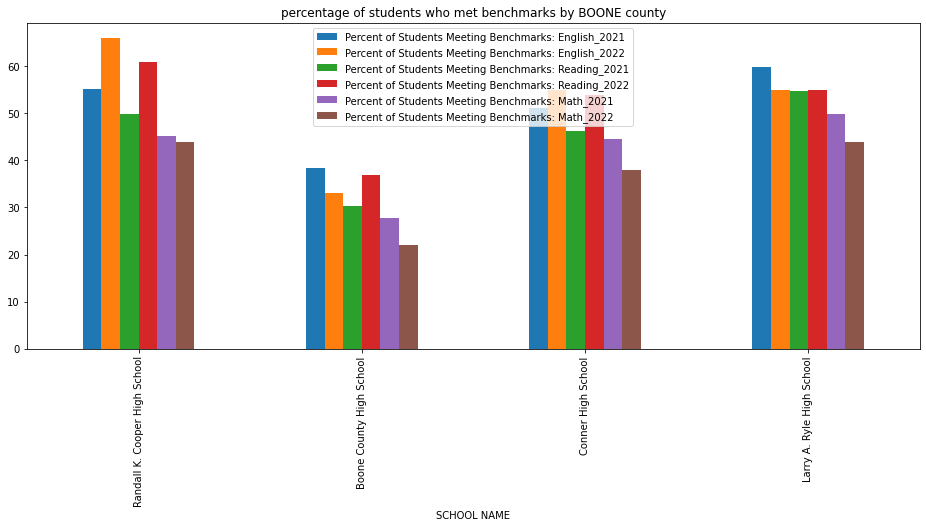

In [77]:
#Plotting the County data to see the trend over time
fig = df_county_benchmark_trend.plot(x= "SCHOOL NAME", kind="bar", figsize=(16,6))
#fmt = '{x:,.0f}'
fig.yaxis.set_major_formatter('{x:,.0f}')
fig.set_title(f'percentage of students who met benchmarks by {input_county} county')

In [78]:
#Pick the School  name to percentage of students who met benchmarks by School
input_school  =  input("Enter the School Name")

print (input_school)



Larry A. Ryle High School


In [79]:
#filtering the data by specified School
df_school_benchmark_trend  = df_benchmark_trend[(df_benchmark_trend['SCHOOL NAME'] == input_school) ] 

In [80]:
#School data that you picked
df_school_benchmark_trend

,COUNTY NAME,DISTRICT NAME,SCHOOL NAME,Percent of Students Meeting Benchmarks: English_2021,Percent of Students Meeting Benchmarks: English_2022,Percent of Students Meeting Benchmarks: Reading_2021,Percent of Students Meeting Benchmarks: Reading_2022,Percent of Students Meeting Benchmarks: Math_2021,Percent of Students Meeting Benchmarks: Math_2022
10,BOONE,Boone County,Larry A. Ryle High School,59.9,55.0,54.8,55.0,49.9,44.0


Text(0.5, 1.0, 'percentage of students who met benchmarks by school')

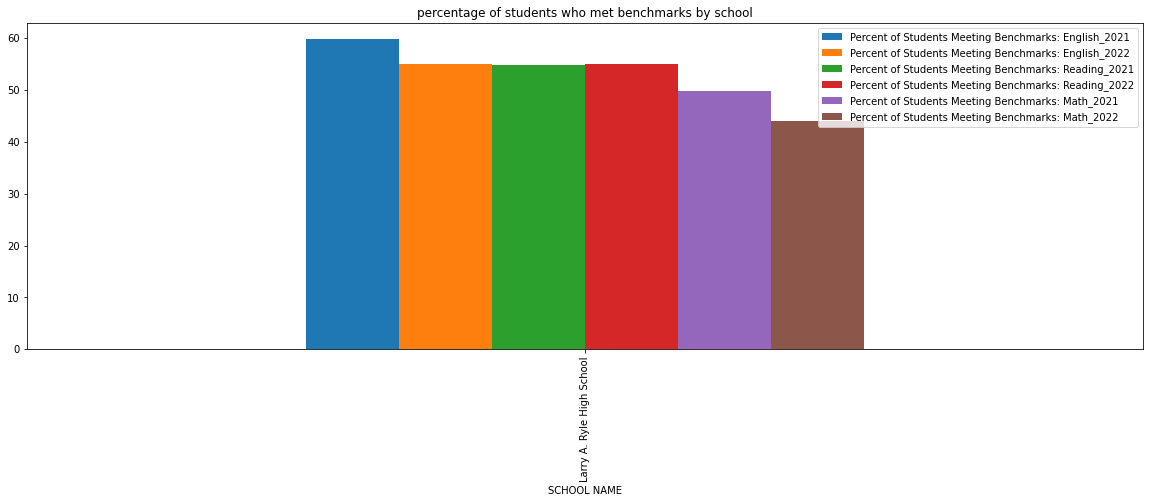

In [81]:
#Plotting the School data to see the trend over time
fig = df_school_benchmark_trend.plot(x= "SCHOOL NAME", kind="bar", figsize=(20,6) )
#fmt = '{x:,.0f}'
fig.yaxis.set_major_formatter('{x:,.0f}')
fig.set_title('percentage of students who met benchmarks by school')